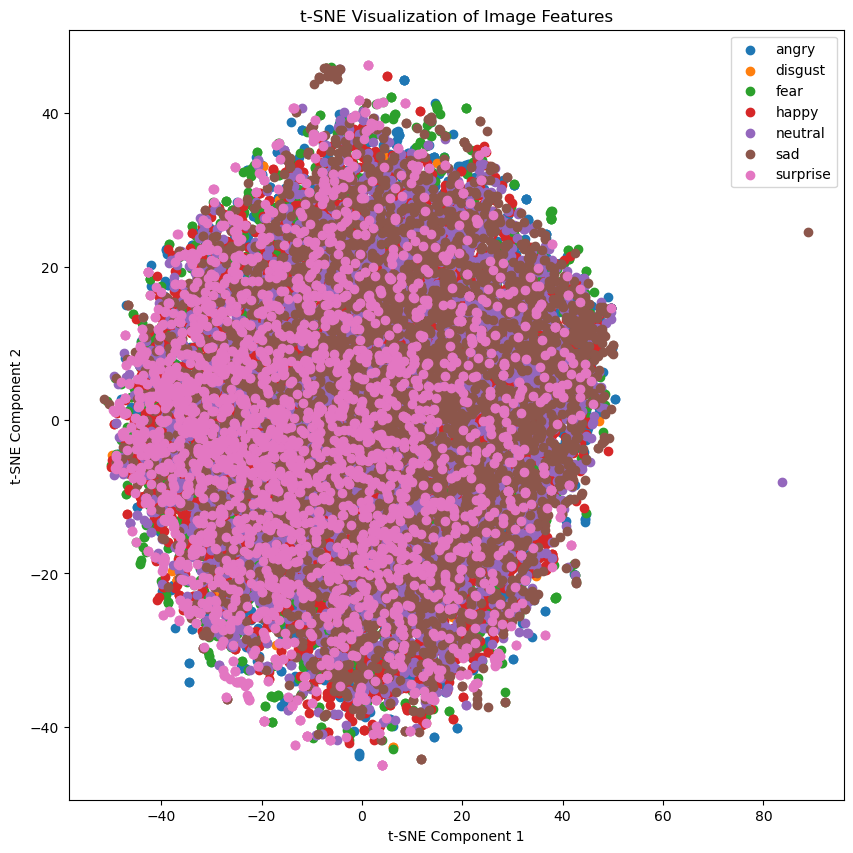

In [1]:
# Ett tidigt försök att skapa en bild av datat och om klasserna ligger homogent fördelat i datasetet med
# t-SNE (t-distributed Stochastic Neighbor Embedding) och där t.ex "sad" och "surprise" verkar ligga lång ifrån varandra
# Detta var intressant och ett tänk startade att skapa modell med 2 klasser med minimal modell men eftersom de vanliga
# 7 klasserna var lätta att modellera så gav jag upp detta.


import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.manifold import TSNE

# Function to load and preprocess images for a specific class
def load_images(folder_path, expression, picture_size):
    images = []
    for filename in os.listdir(os.path.join(folder_path, expression)):
        img = Image.open(os.path.join(folder_path, expression, filename)).resize((picture_size, picture_size))
        img = np.array(img) / 255.0  # Normalize pixel values
        images.append(img)
    return images

# Load images from all classes
picture_size = 48
folder_path = r'C:\Users\Daniel\Documents\ec_utbildning\DL\Kunskapskontroll\images\images\train'
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
all_images = []
class_labels = []  # Store class labels for each image
for idx, expression in enumerate(classes):
    images = load_images(folder_path, expression, picture_size)
    all_images.extend(images)
    class_labels.extend([idx] * len(images))  # Assign a unique label to each class

all_images = np.array(all_images)
images_flattened = all_images.reshape((all_images.shape[0], -1))

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=0)
features_embedded = tsne.fit_transform(images_flattened)

# Plot t-SNE embedding with different colors for each class
plt.figure(figsize=(10, 10))
for idx, expression in enumerate(classes):
    class_indices = np.where(np.array(class_labels) == idx)[0]
    plt.scatter(features_embedded[class_indices, 0], features_embedded[class_indices, 1], label=expression)
plt.title('t-SNE Visualization of Image Features')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()
